# Import the Packages

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
from subprocess import check_output

In [6]:
from keras.utils import to_categorical

/home/atse/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
from sklearn.model_selection import train_test_split

# Reading the Dataset 

In [8]:
train = pd.read_csv('./fashion-mnist_train.csv')
test = pd.read_csv('./fashion-mnist_test.csv')

# Configuring the Image Size

In [9]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [10]:
X = np.array(train.iloc[:, 1:])
y = to_categorical(np.array(train.iloc[:, 0]))

# Checking for NA Values

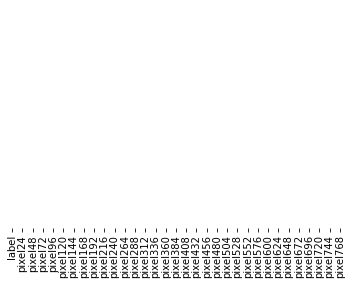

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

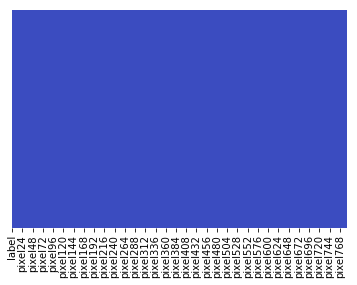

In [12]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Train Test Split for the Dataset

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Test Set

In [14]:
X_test = np.array(test.iloc[:, 1:])
y_test = to_categorical(np.array(test.iloc[:, 0]))

In [15]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

# Importing Keras

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

# Setting Up the Model

In [17]:
batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

# Training the Model with 50 Iterations

In [19]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 64s 1ms/step - loss: 0.7938 - acc: 0.7083 - val_loss: 0.4733 - val_acc: 0.8275
Epoch 2/50
48000/48000 [==============================] - 64s 1ms/step - loss: 0.4929 - acc: 0.8183 - val_loss: 0.4029 - val_acc: 0.8500
Epoch 3/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.4253 - acc: 0.8437 - val_loss: 0.3568 - val_acc: 0.8671
Epoch 4/50
48000/48000 [==============================] - 63s 1ms/step - loss: 0.3856 - acc: 0.8594 - val_loss: 0.3243 - val_acc: 0.8831
Epoch 5/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.3597 - acc: 0.8700 - val_loss: 0.3097 - val_acc: 0.8847
Epoch 6/50
48000/48000 [==============================] - 65s 1ms/step - loss: 0.3409 - acc: 0.8763 - val_loss: 0.2952 - val_acc: 0.8927
Epoch 7/50
48000/48000 [==============================] - 61s 1ms/step - loss: 0.3217 - acc: 0.8809 - val_loss: 0.2871 - val_acc

# Gathering the Test Loss and Accuracy

In [20]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20096725864708423
Test accuracy: 0.9273


# Training, Loss and Validation Accuracy 

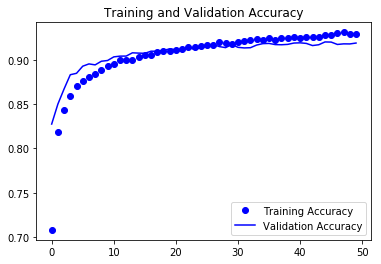

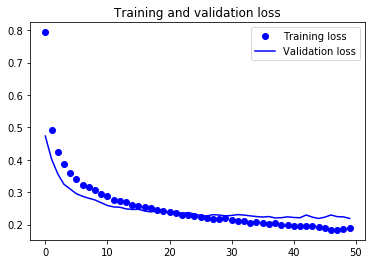

In [21]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Classification Report

In [22]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [23]:
from sklearn.metrics import classification_report

In [24]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.86      0.89      0.88      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.92      0.87      0.89      1000
    Class 3       0.92      0.94      0.93      1000
    Class 4       0.89      0.89      0.89      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.79      0.78      0.78      1000
    Class 7       0.95      0.98      0.97      1000
    Class 8       0.99      0.99      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.93      0.93      0.93     10000



# Predicting the Class - Correct

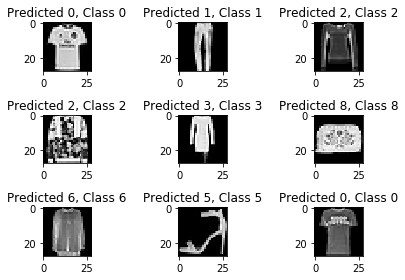

In [25]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

# Predicting the Class - Incorrect

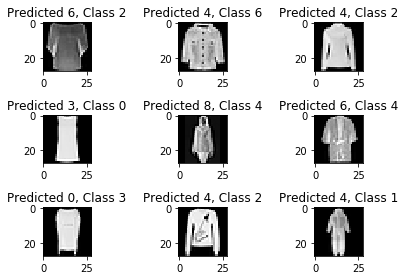

In [26]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

# What Did the Network Learn?

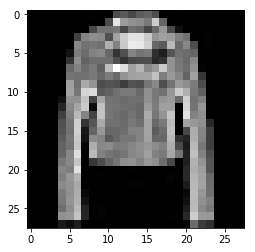

In [27]:
test_im = X_train[13]
plt.imshow(test_im.reshape(28,28), cmap='gray', interpolation='none')
plt.show()

/home/atse/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


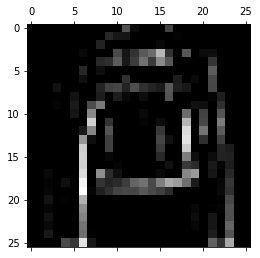

In [28]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')

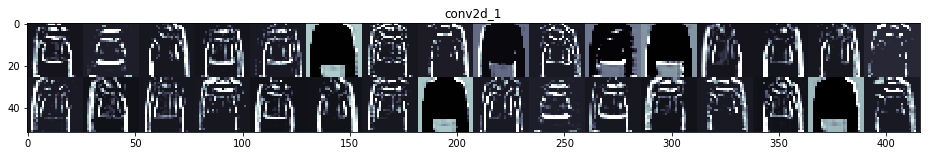

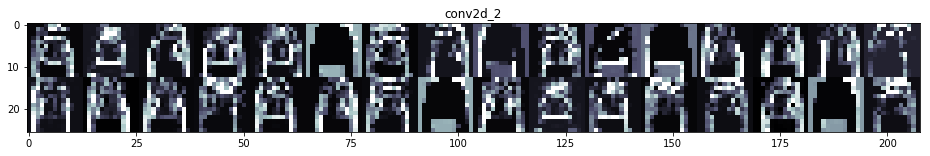

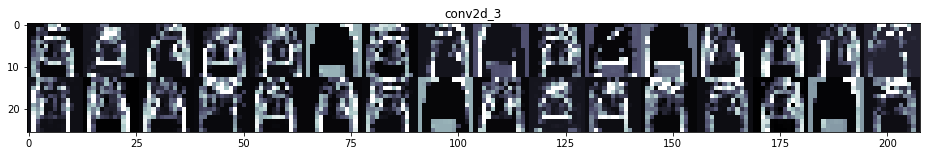

In [29]:
layer_names = []
for layer in model.layers[:-1]:
    if isinstance(layer, Conv2D):
        layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features / images_per_row
    n_cols = int(n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='bone')